# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [14]:
!pip install seaborn
!pip install plotly
!pip install folium

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [15]:
# Leo el dataset
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

In [16]:
# Saco informacion del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [17]:
# Una muestra de 10 
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
40695,31569502,Entire 1 BR Apartment in Perfect Astoria Location,39192815,Agnes,Queens,Astoria,40.76533,-73.92171,Entire home/apt,95,2,0,NaN,NaN,1,0
44252,34126672,ZEN LIVING RM CLOSE 2 COLUMBIA UNI & CENTRAL PRK!,161061302,Carol,Manhattan,Upper West Side,40.80244,-73.96592,Shared room,50,1,1,2019-05-08,0.48,2,363
34947,27703859,"Chic, Spacious Upper West Side Studio",92509169,Abbey,Manhattan,Upper West Side,40.78348,-73.98383,Entire home/apt,148,2,18,2019-06-21,1.74,1,1
19608,15701672,Hidden gem walking distance to Central Park.,34061867,Aydin,Manhattan,Upper East Side,40.77079,-73.95922,Private room,100,2,17,2019-07-02,0.52,1,4
33420,26417485,A get away home,145721354,Gardell,Brooklyn,Prospect-Lefferts Gardens,40.65912,-73.94735,Entire home/apt,44,1,9,2019-06-15,0.77,1,89
8159,6291568,2 Bedroom in Wburg w/ living room,987621,Tommy,Brooklyn,Williamsburg,40.70792,-73.94274,Private room,80,1,2,2015-05-25,0.04,1,0
14279,11085352,"Amazing Williamsburg, Brooklyn Apt.",10994250,Jerry,Brooklyn,Williamsburg,40.70925,-73.94909,Private room,50,1,0,NaN,NaN,1,0
37906,29983341,Cute Hells Kitchen Apt. w Balcony,49745850,Alana,Manhattan,Hell's Kitchen,40.76192,-73.99698,Entire home/apt,400,3,14,2019-03-31,1.92,1,0
12747,9755479,Beautiful 1BR NYC,18799694,Evan,Manhattan,East Village,40.73333,-73.99075,Entire home/apt,300,1,0,NaN,NaN,1,0
14605,11531154,Beautiful Apartment in Chelsea,27906470,Robin,Manhattan,Chelsea,40.74161,-74.00162,Private room,70,1,0,NaN,NaN,1,0


In [18]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


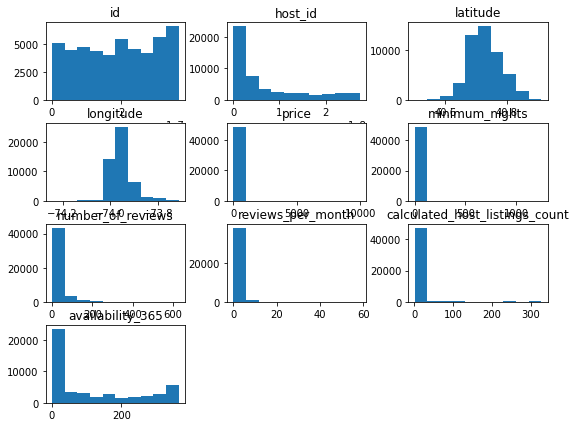

In [20]:
# Hago un histograma de todas las variables
df.hist(bins=10,figsize=(9,7),grid=False)
# Le saco todos los comentarios que me pone al graficar
plt.show()

In [21]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [22]:
location = list(zip(df.latitude, df.longitude))

map = folium.Map(location=[40.7,-74], zoom_start=10) # La locacion inicial la elijo por el sample
FastMarkerCluster(data = location).add_to(map)
map

In [29]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

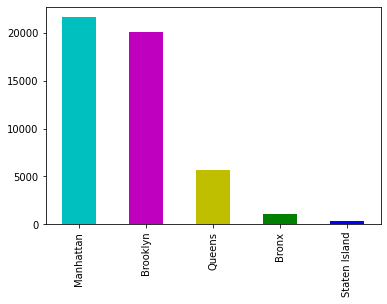

In [83]:
df['neighbourhood_group'].value_counts().plot.bar(color=['c','m','y','g','b'])
plt.show()

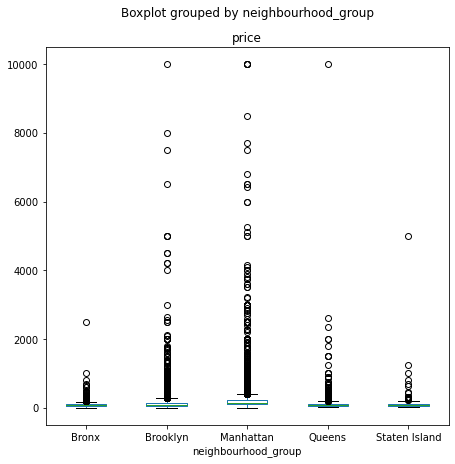

In [69]:
df.boxplot(column='price',by='neighbourhood_group',figsize=(7,7),grid=False)
plt.show()

In [36]:
df.groupby('neighbourhood_group')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
neighbourhood_group,,,
Bronx,87.496792,0,2500
Brooklyn,124.383207,0,10000
Manhattan,196.875814,0,10000
Queens,99.517649,10,10000
Staten Island,114.812332,13,5000


In [59]:
# Analizo aquellos que piden menos de 1 año como minimo
df_dias = df[df['minimum_nights']<365]
df_dias['minimum_nights'].value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
68         1
87         1
183        1
299        1
36         1
Name: minimum_nights, Length: 100, dtype: int64

In [ ]:
# Hay 100 con menos de 1 año

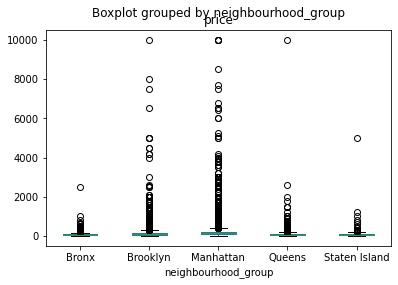

In [60]:
df_dias.boxplot(column='price',by='neighbourhood_group',grid=False)
plt.show()

In [61]:
# Analizo aquellos que piden como minimo 1 año
df_año = df[df['minimum_nights']==365]
df_año['minimum_nights'].value_counts()

365    29
Name: minimum_nights, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood_group'>

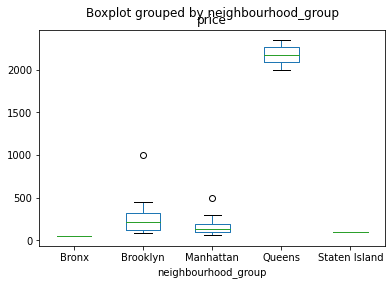

In [62]:
df_año.boxplot(column='price',by='neighbourhood_group',grid=False)

In [ ]:
# Es mas caro en Queens

In [54]:
# Analizo aquellos que piden como minimo mas de 1 año
df_2año = df[df['minimum_nights']>365]
df_2año['minimum_nights'].value_counts()

500     5
999     3
370     1
1000    1
1250    1
480     1
366     1
400     1
Name: minimum_nights, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='neighbourhood_group'>

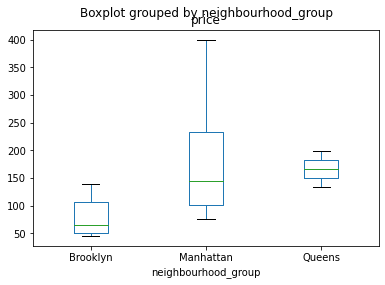

In [53]:
df_2año.boxplot(column='price',by='neighbourhood_group',grid=False)

In [ ]:
# No hay para alquilar para mas de 1 año en Bronx ni en Staten Island

Analizo que pasa con el tipo de cuarto, segun precio y segun vecindario

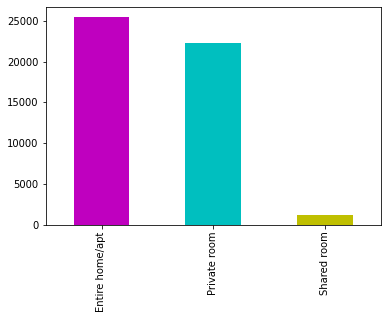

In [82]:
df['room_type'].value_counts().plot.bar(color=['m','c','y'])
plt.show()

In [65]:
pd.crosstab(df['neighbourhood_group'],df['room_type'])

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


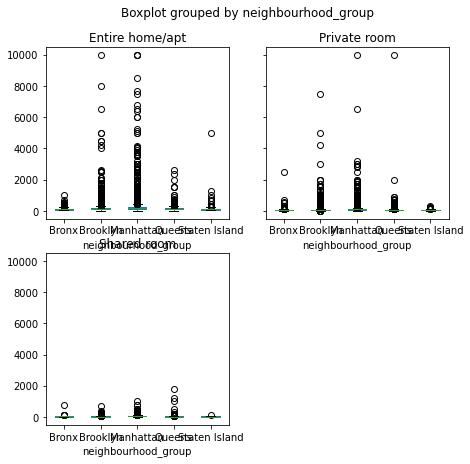

In [89]:
df.groupby('room_type').boxplot(column='price',by='neighbourhood_group',figsize=(7,7),grid=False)
plt.show()

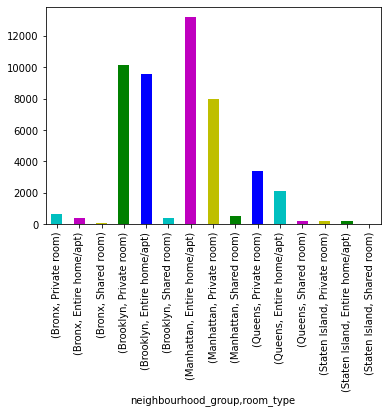

In [95]:
df.groupby('neighbourhood_group')['room_type'].value_counts().plot.bar(color=['c','m','y','g','b'])
plt.show()

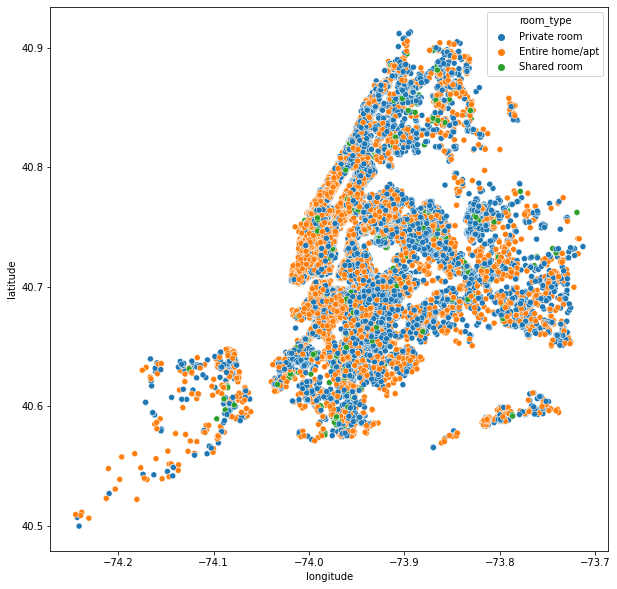

In [102]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['room_type'])
plt.show()

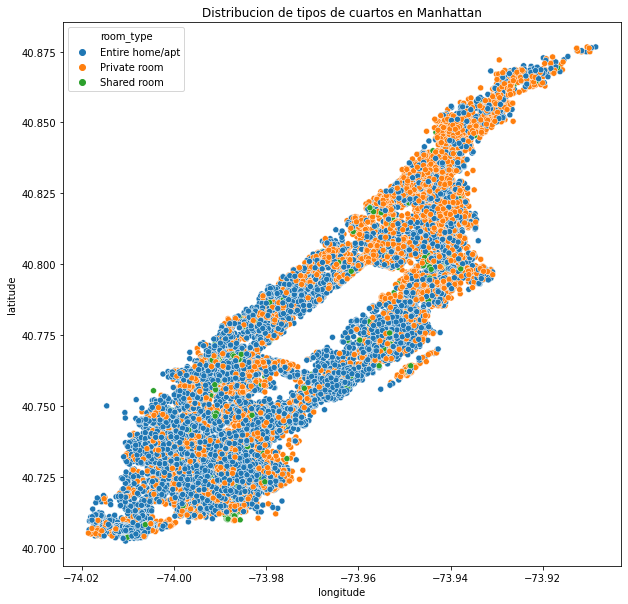

In [107]:
df1 = df[df['neighbourhood_group'] == 'Manhattan']
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df1['room_type'])
plt.title('Distribucion de tipos de cuartos en Manhattan')
plt.show()


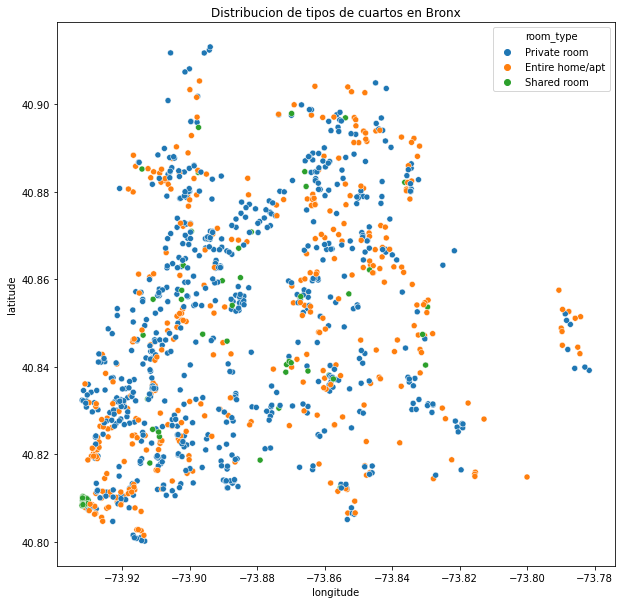

In [112]:
df1 = df[df['neighbourhood_group'] == 'Bronx']
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df1['room_type'])
plt.title('Distribucion de tipos de cuartos en Bronx')
plt.show()

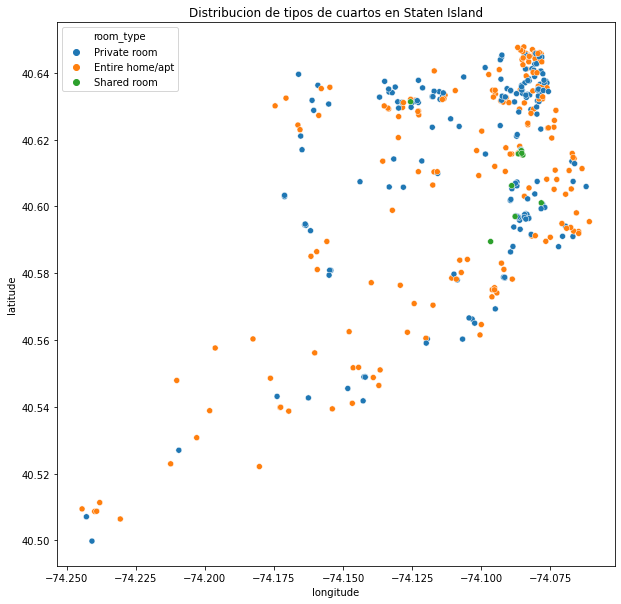

In [113]:
df1 = df[df['neighbourhood_group'] == 'Staten Island']
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df1['room_type'])
plt.title('Distribucion de tipos de cuartos en Staten Island')
plt.show()

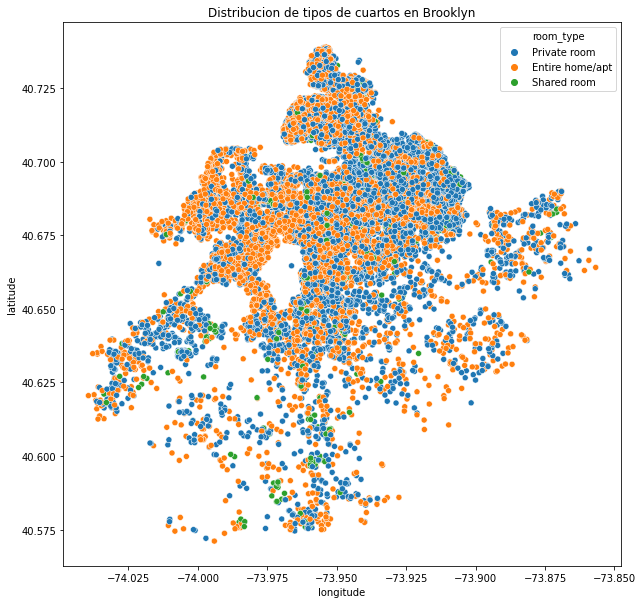

In [114]:
df1 = df[df['neighbourhood_group'] == 'Brooklyn']
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df1['room_type'])
plt.title('Distribucion de tipos de cuartos en Brooklyn')
plt.show()

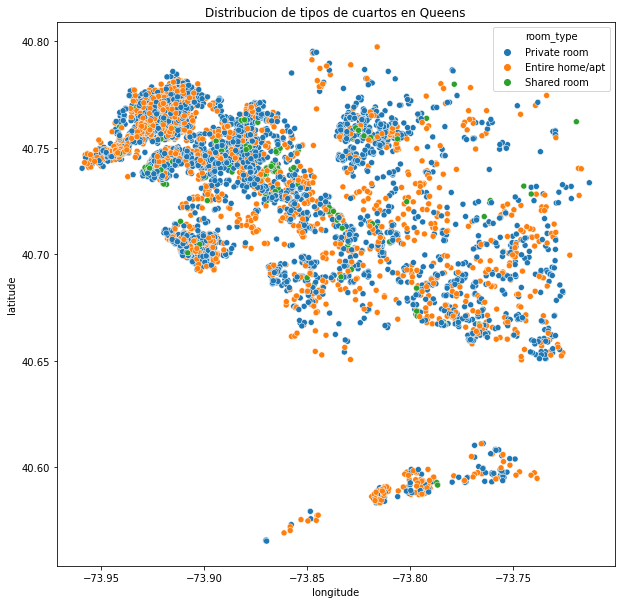

In [115]:
df1 = df[df['neighbourhood_group'] == 'Queens']
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df1['room_type'])
plt.title('Distribucion de tipos de cuartos en Queens')
plt.show()

In [ ]:
# La mayor cantidad son casas enteras en Manhatan, luego un cuartos privados en Brooklyn
# No encuentro ninguna tendencia en el skatter plot

In [66]:
df.groupby('room_type')['price'].agg(['mean', 'min', 'max'])

,mean,min,max
room_type,,,
Entire home/apt,211.794246,0,10000
Private room,89.780973,0,10000
Shared room,70.127586,0,1800


In [ ]:
# Mas cara la casa entera en promedio, pero el maximo es igual al del cuarto privado

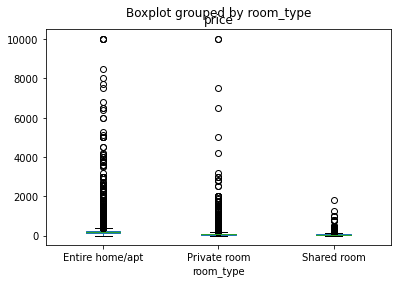

In [67]:
df.boxplot(column='price',by='room_type',grid=False)
plt.show()

Anallizo correlaciones entre las columnas

<AxesSubplot:>

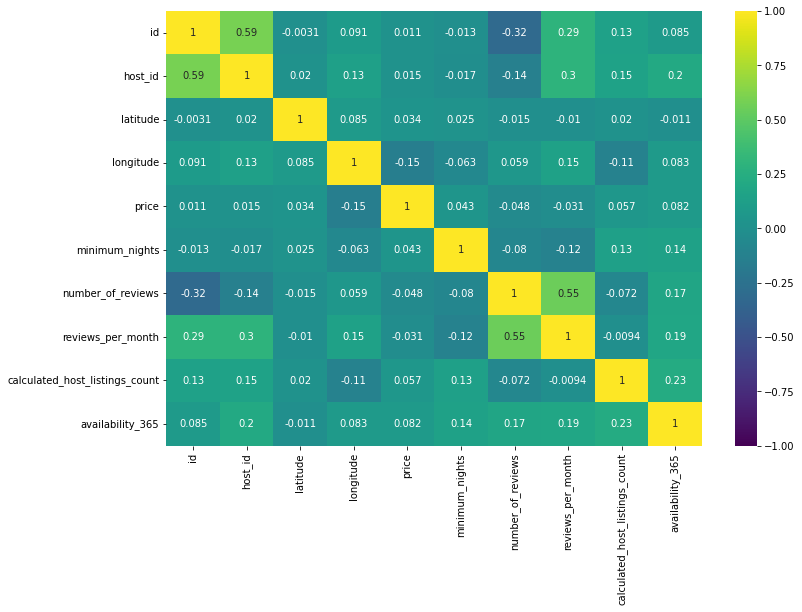

In [98]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

In [ ]:
# Podemos ver, que la correlacion mas alta se da entre el id y number_of_reviews, tiene sentido porque es algo que depende de la persona